# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from pandas.api.types import is_numeric_dtype
from itertools import product
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import SVR
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.regressor import prediction_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'regression'

In [3]:
stacking = 'True'

In [4]:
data_size = 'large'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.6/dataset/diamonds.csv')

In [6]:
target_col = 'price'

In [7]:
user_drop_cols = []

In [8]:
threshold_NaN = 0.5

In [9]:
threshold_cat = 5

In [10]:
threshold_Z = 3.0

### Dataset Information

In [11]:
df.shape

(53940, 10)

#### Some records

In [12]:
display(df)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Dataframe structure

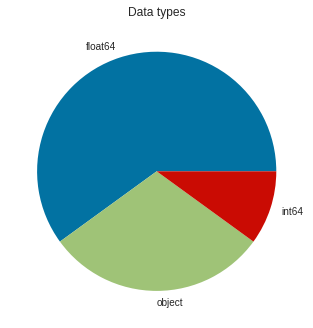

In [13]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [14]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


#### Which columns could be categorical ?

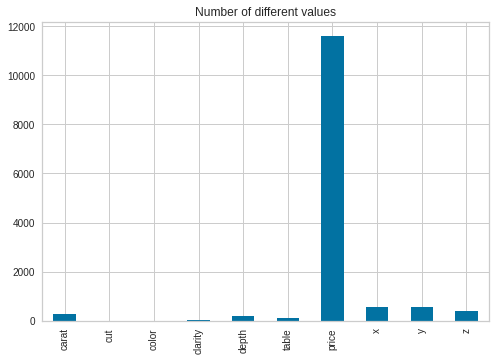

In [15]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [16]:
duplicates(df)

Number of rows before removing: 53940
Number of duplicate rows: 146
Number of rows after removing: 53794


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Drop user's columns:

In [17]:
print('user_drop_cols = ', user_drop_cols)

user_drop_cols =  []


In [18]:
df = df.drop(user_drop_cols, axis=1)

#### Drop NaN:

In [19]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [20]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [21]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [22]:
df, encoded_cols = encoding(df, threshold_cat)

Encoding numeric column: carat
Encoding object column: cut
Encoding object column: color
Encoding object column: clarity
Encoding numeric column: depth
Encoding numeric column: table
Encoding numeric column: price
Encoding numeric column: x
Encoding numeric column: y
Encoding numeric column: z


#### Imputing NaN using IterativeImputer

No handles with labels found to put in legend.


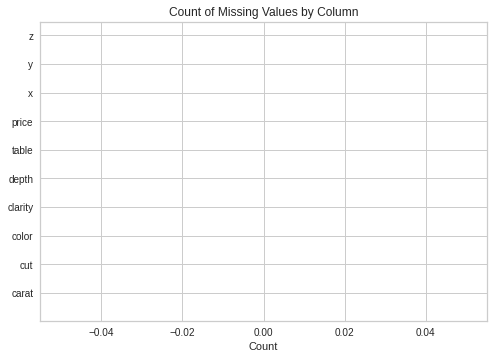

In [23]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [24]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [25]:
df = downcast_dtypes(df)

Memory usage of dataframe is 4.12MB
Memory usage after optimization is: 0.87MB
Decreased by 78.7%


##### Dataframe structure after compression

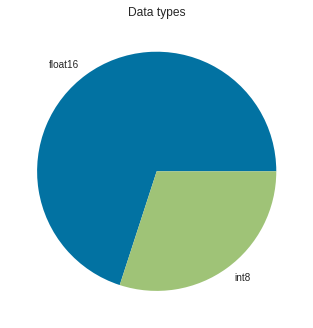

In [26]:
plot_dataframe_structure(df)

#### Outliers:

In [27]:
df = outliers(df, threshold_Z)

Using Z_score,  2351  rows will be suppressed.


#### Splitting dataframe in features and targets

In [28]:
y = df[target_col]

In [29]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

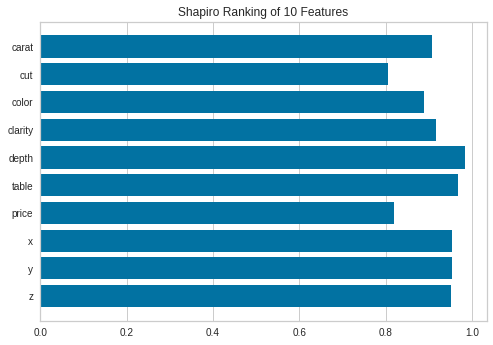

In [30]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

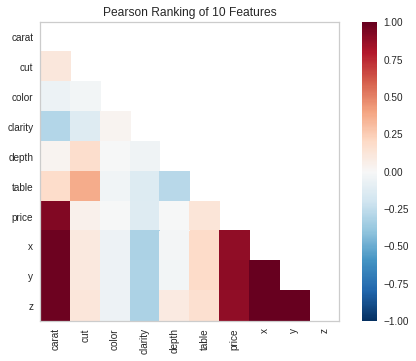

In [31]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

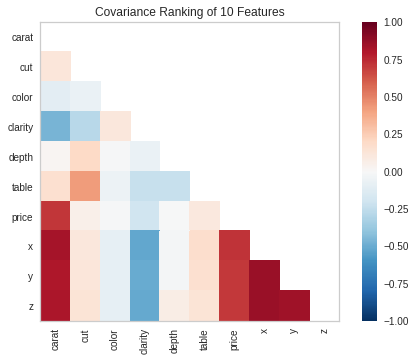

In [32]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

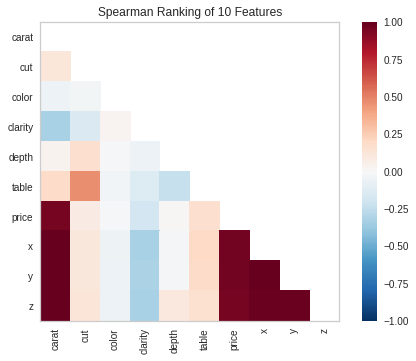

In [33]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

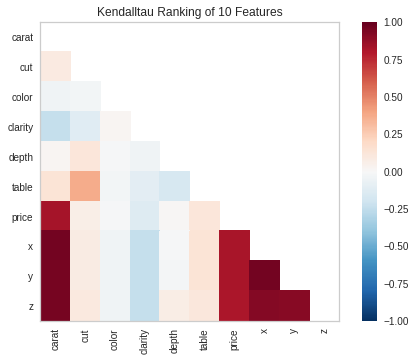

In [34]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

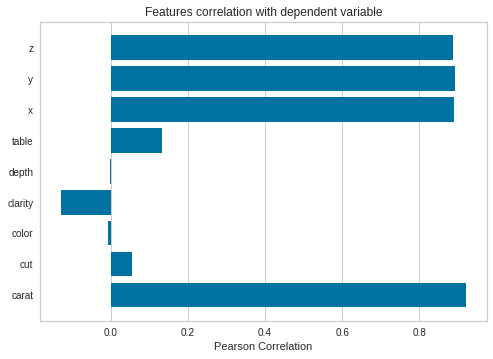

In [35]:
feature_correlation(X, y);

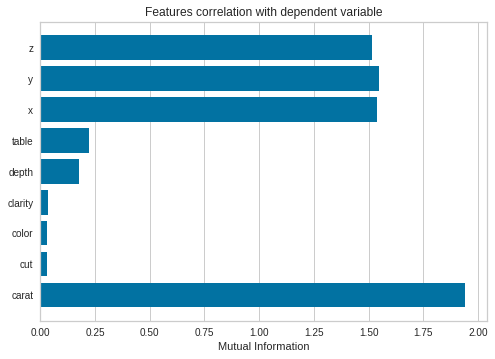

In [36]:
feature_correlation(X, y, method='mutual_info-regression');

#### Feature importance (a priori)

##### According to decision tree

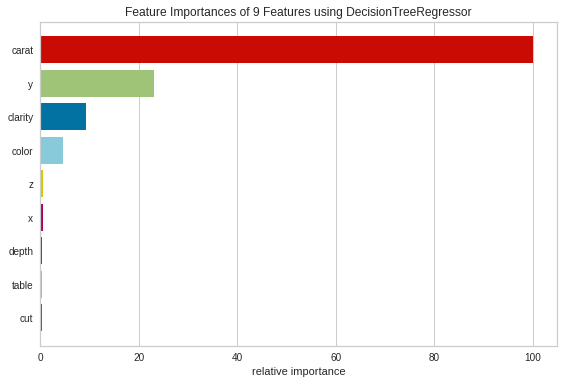

In [37]:
feature_importances(DecisionTreeRegressor(), X, y);

##### According to elasticnet regression

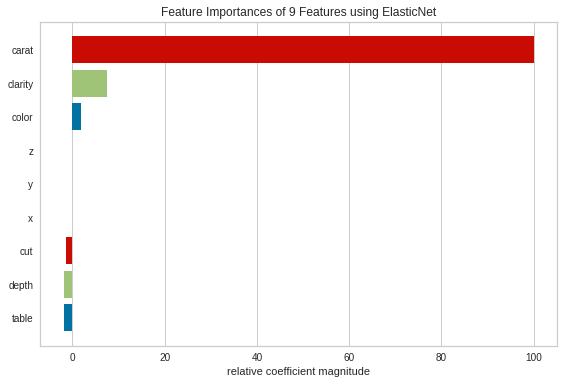

In [38]:
feature_importances(ElasticNet(alpha=0.01, l1_ratio=0.5), X, y);

## Splitting data in train and test sets 

In [39]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

## Modelling

### Model building

##### Level-0 models

In [40]:
level_0 = [ 
          ('RFR', RandomForestRegressor(max_depth=5, n_estimators=10, max_features='auto')), 
          ('ABR', AdaBoostRegressor()), 
          ('SGDR', SGDRegressor(loss='squared_loss')), 
          ('ELNE', ElasticNet(alpha=0.01, l1_ratio=0.5)), 
          ('SVRL', SVR(kernel='linear')), 
          ('SVRP', SVR(kernel='poly')), 
          ('SVRG', SVR(kernel='rbf')), 
          ]

##### Level-1 model

In [41]:
level_1 = MLPRegressor()

##### Stacking for regression

In [42]:
model = StackingRegressor(level_0, final_estimator=level_1)

### Model fitting

In [43]:
%%time
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 31min 11s, sys: 1min 33s, total: 32min 44s
Wall time: 36min 1s


StackingRegressor(estimators=[('RFR',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=10)),
                              ('ABR', AdaBoostRegressor()),
                              ('SGDR', SGDRegressor()),
                              ('ELNE', ElasticNet(alpha=0.01)),
                              ('SVRL', SVR(kernel='linear')),
                              ('SVRP', SVR(kernel='poly')), ('SVRG', SVR())],
                  final_estimator=MLPRegressor())

### Model evaluation

#### Model scoring

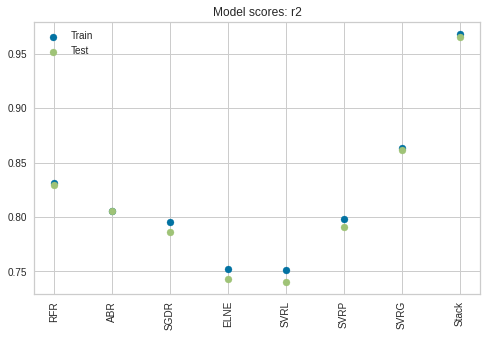

array([['RFR', 0.8310981300843504, 0.8294953769477871],
       ['ABR', 0.8053226653636998, 0.8054351799413637],
       ['SGDR', 0.7951090791764118, 0.786652134637502],
       ['ELNE', 0.7521036444918091, 0.7430002971605889],
       ['SVRL', 0.7509257272534979, 0.7407039371368007],
       ['SVRP', 0.7984076024095866, 0.7905332818262206],
       ['SVRG', 0.8638974441510305, 0.862088664565221],
       ['Stack', 0.96788436710076, 0.9652526324537773]], dtype=object)

In [44]:
score_stacking_r(model, X_train, y_train, X_test, y_test)

#### Feature permutation importance (a posteriori)

In [45]:
plot_perm_imp(model, X, y, scoring = 'r2');

KeyboardInterrupt: 

#### Residuals plot

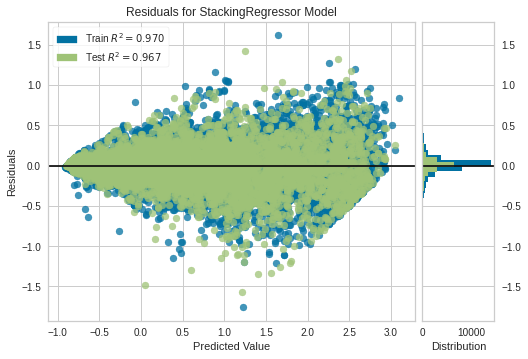

In [46]:
residuals_plot(model, X_train, y_train, X_test, y_test);

#### Prediction error

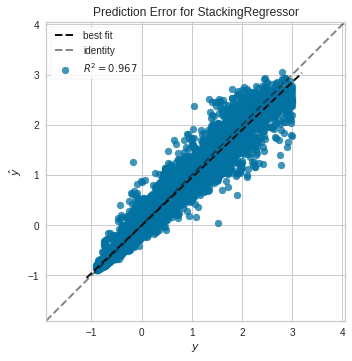

In [47]:
prediction_error(model, X_train, y_train, X_test, y_test);